# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [150]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [151]:
#url=http://api.openweathermap.org/data/2.5/weather?appid=9e8ad36944a36af2b33e09daa8e352bb&units=metric&q=
url="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
lat= []
temp=[]
cityname=[]
humidity=[]
clouds=[]
windspeed=[]

#Query URL
query_url= f"{url}appid={weather_api_key}&units={units}&q="
for city in cities[:700]:
    
    
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        cityname.append(city)
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        
        print(city)
    except:
        print("city not found")
        pass
  


city not found
ushuaia
bethel
yellowknife
new norfolk
los llanos de aridane
jinchang
tuktoyaktuk
city not found
hithadhoo
city not found
city not found
olafsvik
nikolskoye
rio grande
punta arenas
airai
cherskiy
georgetown
mataura
biskamzha
kapaa
city not found
northampton
hobart
rikitea
atuona
puerto ayora
abu dhabi
oktyabrskoye
jamestown
black river
sao jose da coroa grande
lompoc
ribeira grande
arraial do cabo
vana-vigala
city not found
city not found
korla
bhaderwah
balakhta
norman wells
bluff
garni
saldanha
port alfred
barrow
dikson
rossland
chester
freeport
shingu
kieta
hilo
barcelos
umm kaddadah
albany
faanui
kanniyakumari
vaini
waw
saint anthony
batagay
qaanaaq
city not found
san antonio
quatre cocos
fort payne
city not found
city not found
hermanus
saint-philippe
preston
north bend
torbay
cape town
labuhan
bad waldsee
rio de loba
bocaiuva
kruisfontein
lebedinyy
pangnirtung
touros
tasiilaq
bredasdorp
fortuna
butaritari
ostrovnoy
along
ngunguru
petropavlovka
hasaki
bambous virieu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [156]:
weather_dict= {
            "City": cityname,
            "Latitude":   lat,
            "Temperature": temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": windspeed
}
weather_data= pd.DataFrame(weather_dict)

weather_data.head(20)

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,ushuaia,-54.8000,41.00,81,40,2.30
1,bethel,41.3712,68.97,40,1,3.44
2,yellowknife,62.4560,14.74,85,75,11.50
3,new norfolk,-42.7826,50.99,85,96,3.20
4,los llanos de aridane,28.6585,66.97,64,75,4.61
5,jinchang,38.4953,60.91,18,99,21.83
6,tuktoyaktuk,69.4541,15.80,79,75,10.36
7,hithadhoo,-0.6000,83.79,65,60,2.46
8,olafsvik,64.8945,43.77,68,6,5.64
9,nikolskoye,59.7035,39.40,60,40,15.66


In [153]:
weather_data.to_csv('citydatainfo.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

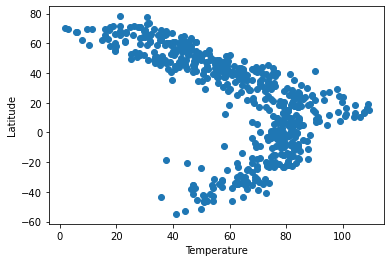

In [159]:
plt.scatter(weather_data["Temperature"],weather_data["Latitude"])
plt.xlabel("Temperature")
plt.ylabel("Latitude")

In [ ]:
#There seems to be a negative correlation between high latitudes and lower temperatures 

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

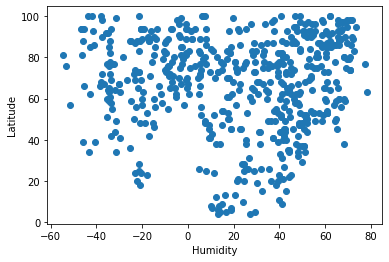

In [161]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"])
plt.xlabel("Humidity")
plt.ylabel("Latitude")

In [ ]:
# There doesn't seem to be a correlation between humidity and latitude. 

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

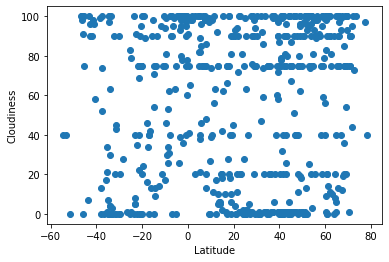

In [162]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

In [ ]:
#Latitude doesn't have an impact on how cloudy a city is. 

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

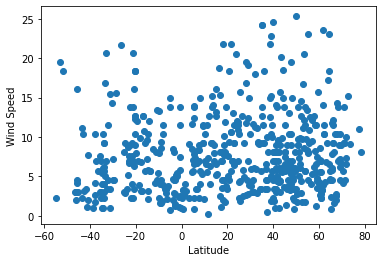

In [163]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

In [ ]:
#The majority of wind speed is under 15 MPH

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression